---
## Kirjastot

In [1]:
import numpy as np
from PIL import Image, ImageDraw, ImageColor, ImageFont
# from IPython.display import Image as showImage

In [13]:
# %load g:/wiki/sivut/python_pil_mask.py
from PIL import Image
from PIL import ImageDraw
from PIL import ImageStat

i = 2
#imIn = Image.open("C:/users/jokemjaa/Pictures/brain_0{}.jpg".format(i))
imIn = Image.open("C:/users/jokemjaa/Pictures/Camera Roll/temp.jpg".format(i))
imOut = Image.new("RGB", imIn.size)

widthIn, heightIn = imIn.size
scale = 15
x, y = widthIn / scale, heightIn / scale
# print x, y
#drawMask.ellipse((10, 100, 50, 50), 1)


deltaX = widthIn / x
deltaY = heightIn / y

for i in range(int(x)):
    for j in range(int(y)):
        offsetX = widthIn * i / x 
        offsetY = heightIn * j / y
        mask = Image.new("1", imIn.size)
        drawMask = ImageDraw.Draw(mask)
#        drawMask.rectangle((offsetX , offsetY, offsetX + deltaX , offsetY + deltaY), 1)
#        drawMask.ellipse((offsetX , offsetY, offsetX + deltaX , offsetY + deltaY), 1)
        drawMask.ellipse((offsetX + 1 , offsetY + 1, offsetX + deltaX - 1 , offsetY + deltaY - 1), 1)
        teema = ImageStat.Stat(imIn, mask).median
#        print teema 
        dyyni = Image.new("RGB", imIn.size, tuple(teema))
        imOut.paste(dyyni, mask = mask)

imOut.save("C:/users/jokemjaa/Pictures/last.jpg")



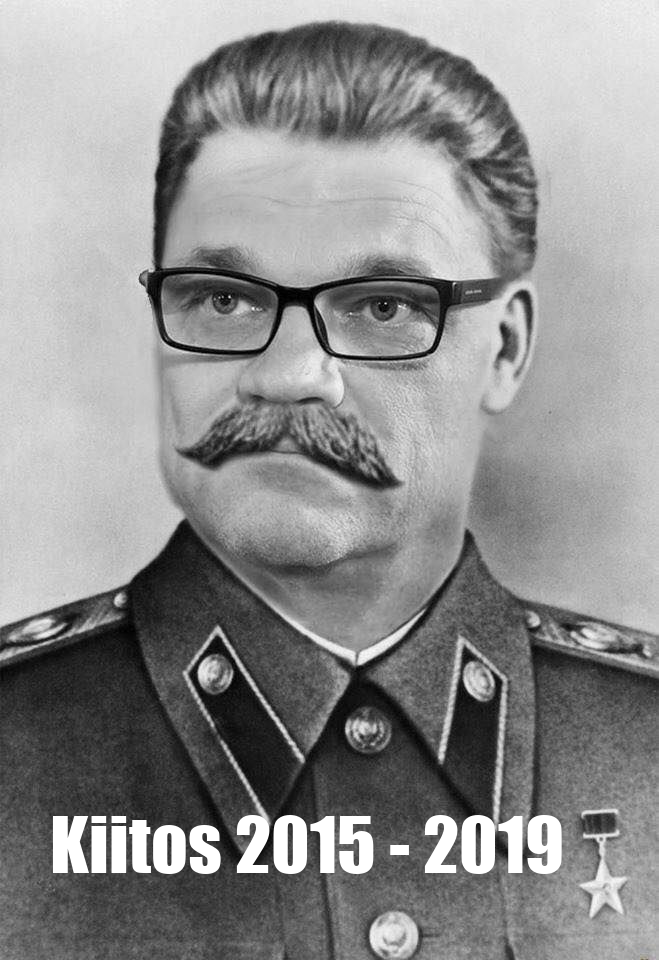

In [14]:
imIn = Image.open("G:/omat/sst.jpg")

font = ImageFont.truetype("impact.ttf", 72)
draw = ImageDraw.Draw(imIn)

txt = "Kiitos 2015 - 2019"

draw.text((50, 800), txt, "white", font = font)


display(imIn)

In [16]:
widthIn, heightIn = imIn.size
w = 240
nx = int(np.ceil(widthIn / w))
ny = int(np.ceil(heightIn / w))
imgCount = nx * ny

print(f"Image count {imgCount} = {nx} * {ny}")

Image count 12 = 3 * 4


In [22]:
def fours(im):
    ret = []
    (x, y) = im.size
    for j in range(2):
        for i in range(2):
            ret.append(im.crop((i * x / 2, j * y / 2, (i + 1) * x / 2, (j + 1) * y / 2)))
    return ret

def subImg(i, j):
    ret = Image.new("RGB", (900, 900), color = "cyan")
    x = i * w
    y = j * w
    im = imIn.crop((x, y, x + w, y + w))
    imRed = Image.new("RGB", (w, w), color = "red")
    block = imIn.copy()
    block.paste(imRed, (x, y))
#     display(block)
    ret.paste(im, (50, 50))
    ret.paste(block.resize((int(w / 2), int(w / 2 * heightIn / widthIn))), (50, 300))
    subs = fours(im)
    for n in range(4):
        sub = subs[n].resize((w, w))
        subx = 250 + 150 * n
        ret.paste(sub, (subx, 50))
        subSubs = fours(sub)
        for subn in range(4):
            subsub = subSubs[subn].resize((w, w))
            suby = 250 + 150 * subn
            ret.paste(subsub, (subx, suby))
            
    return ret


# subImg(5, 7)

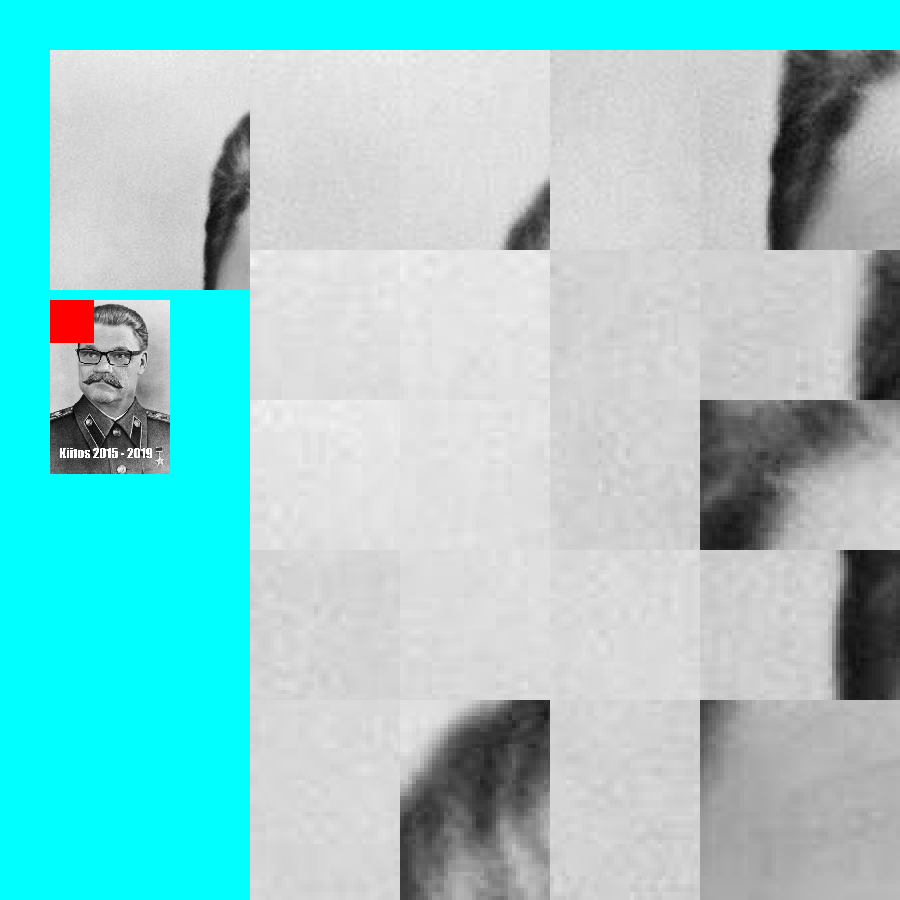

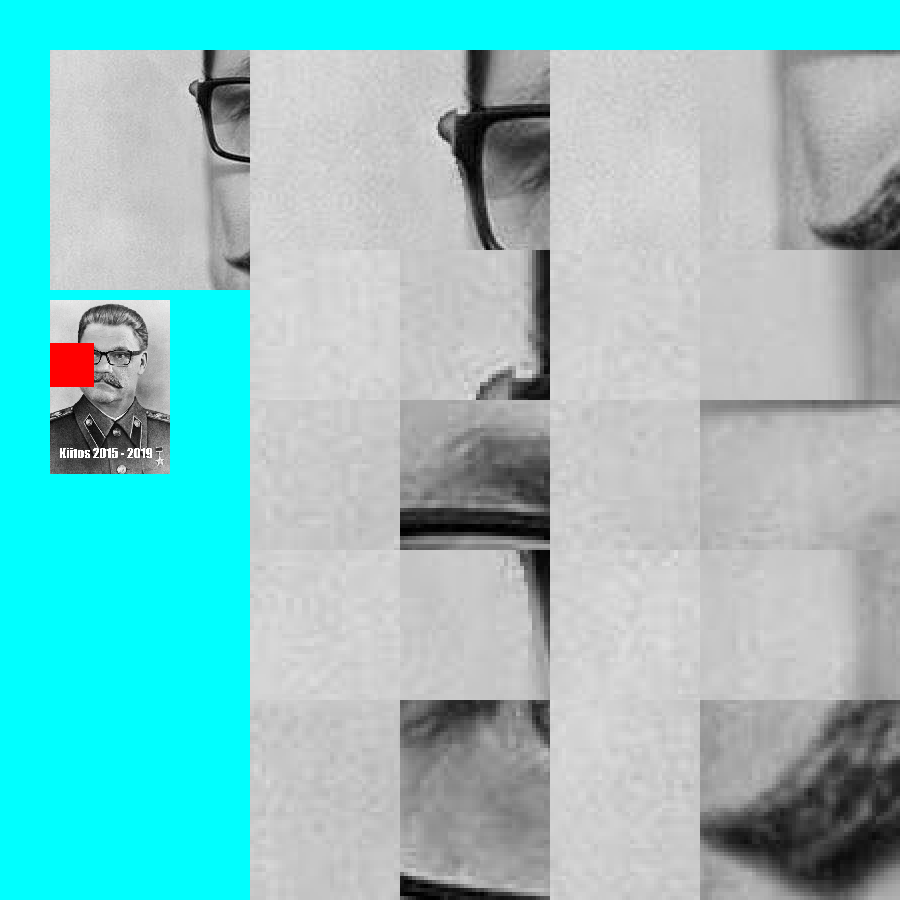

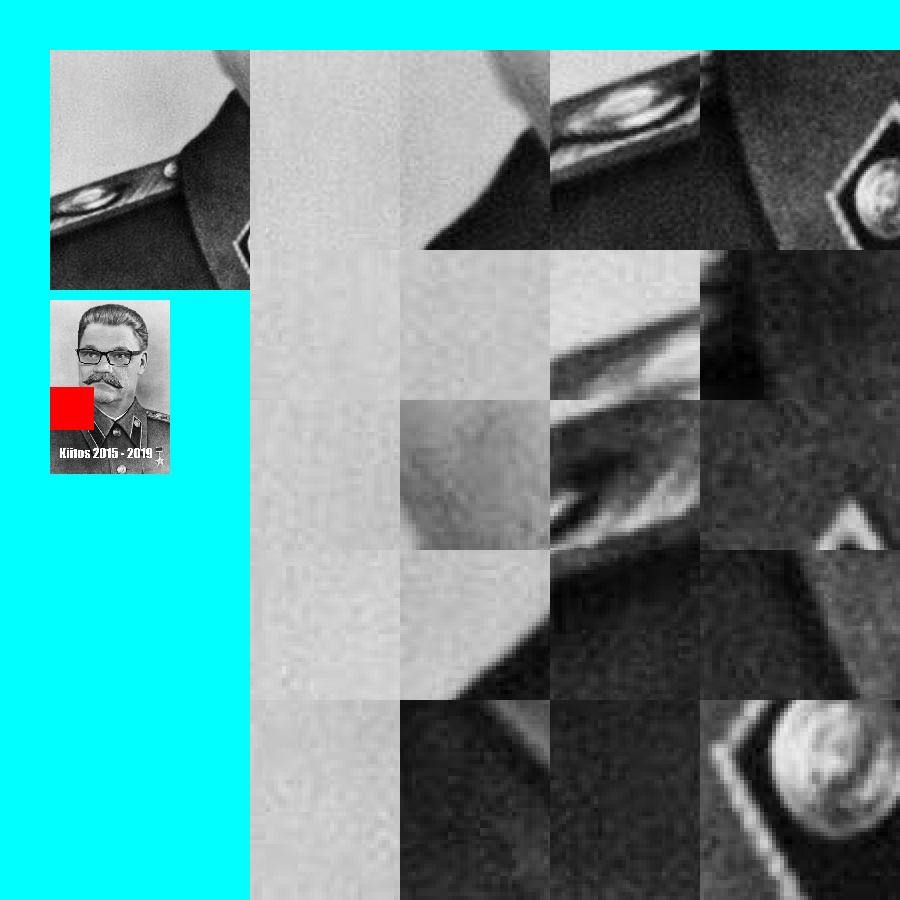

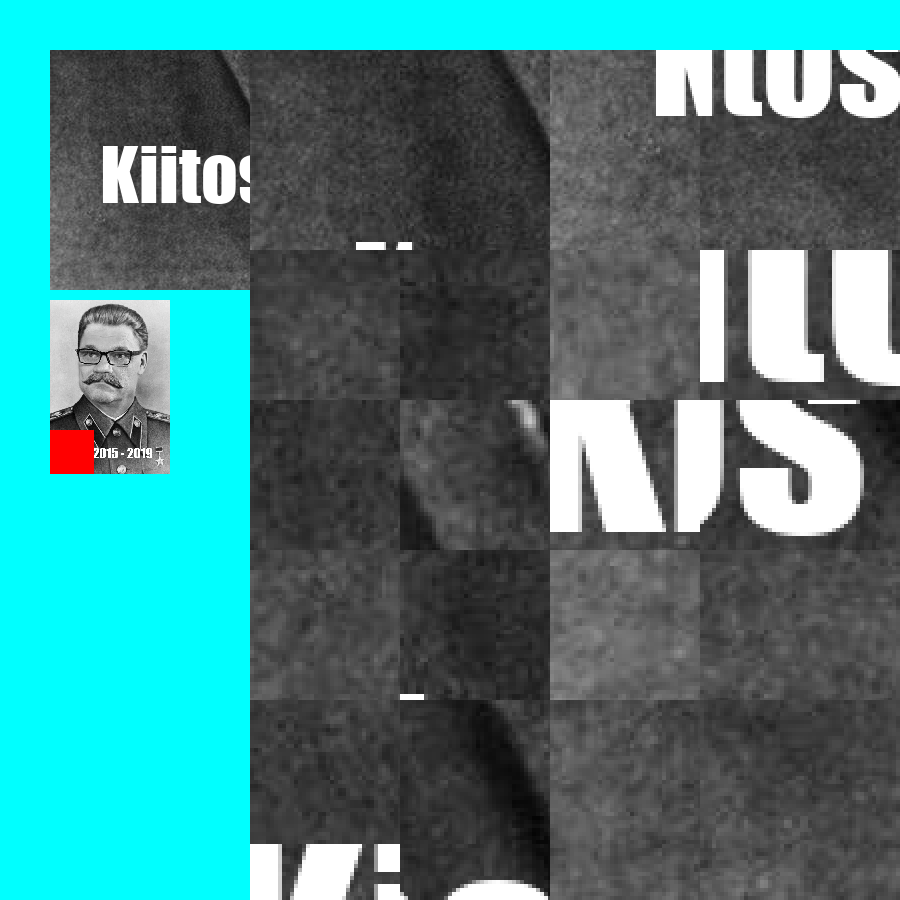

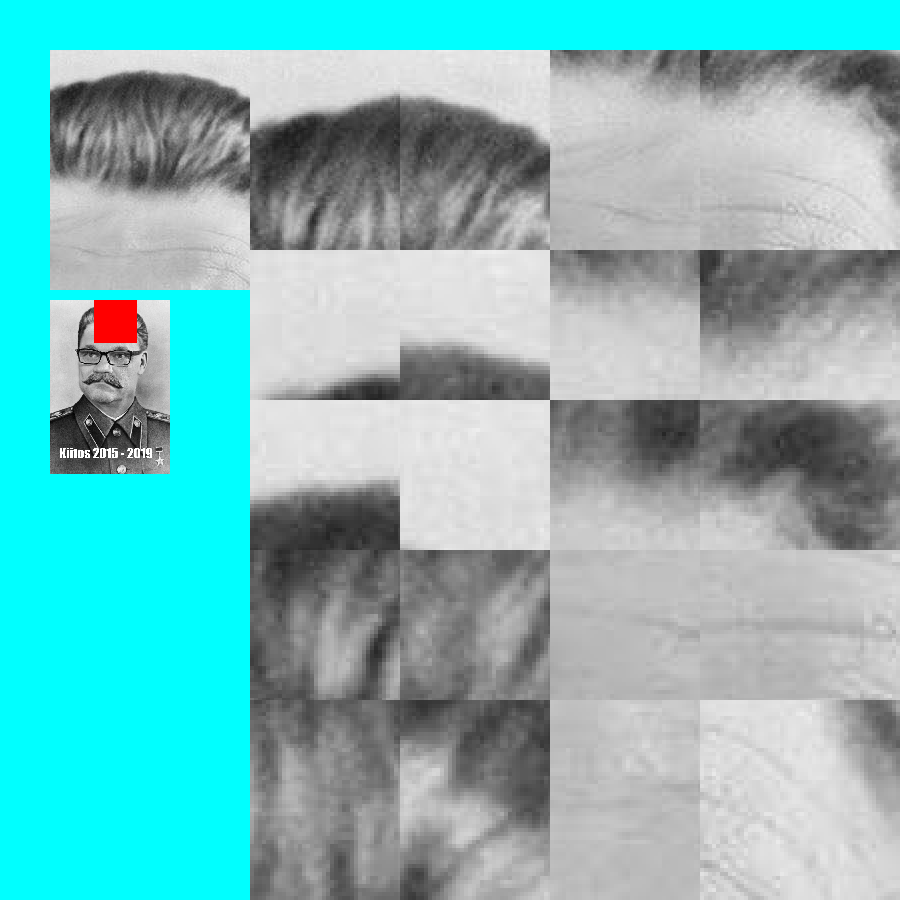

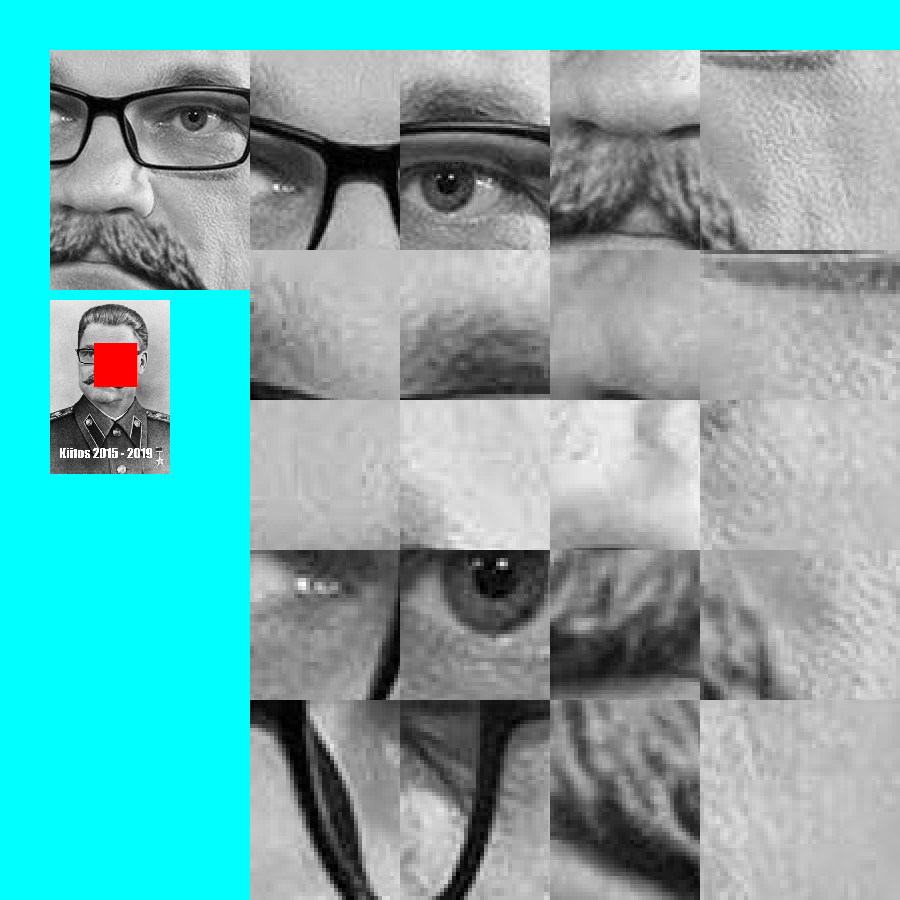

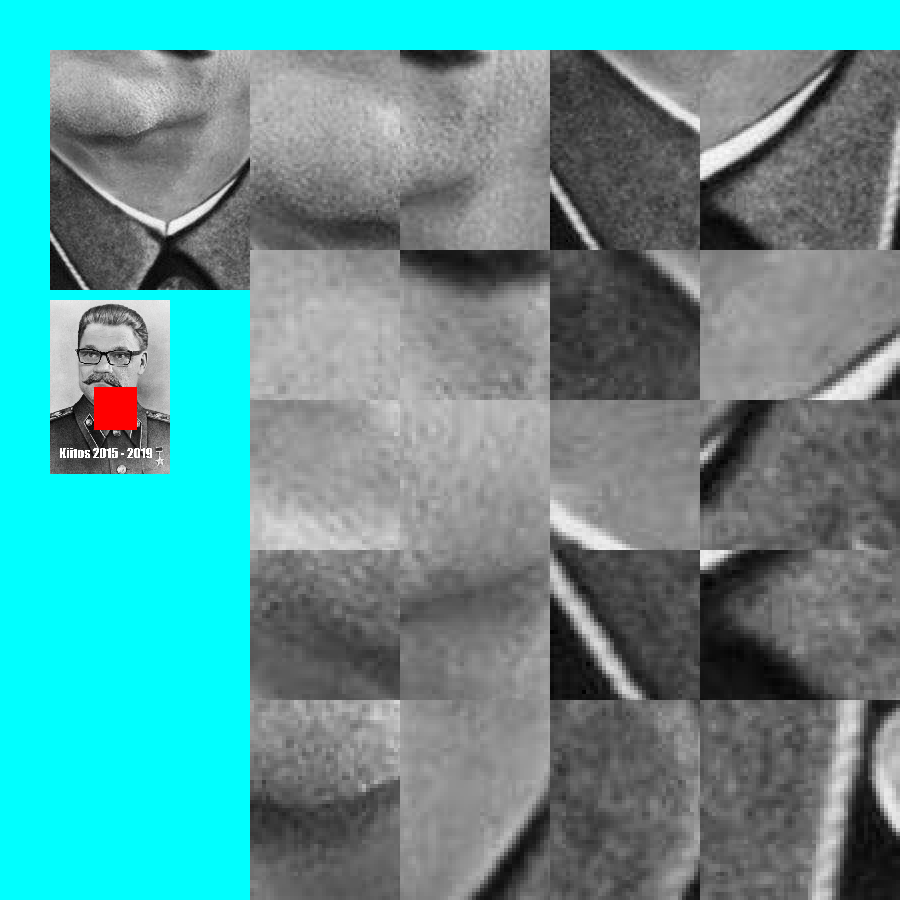

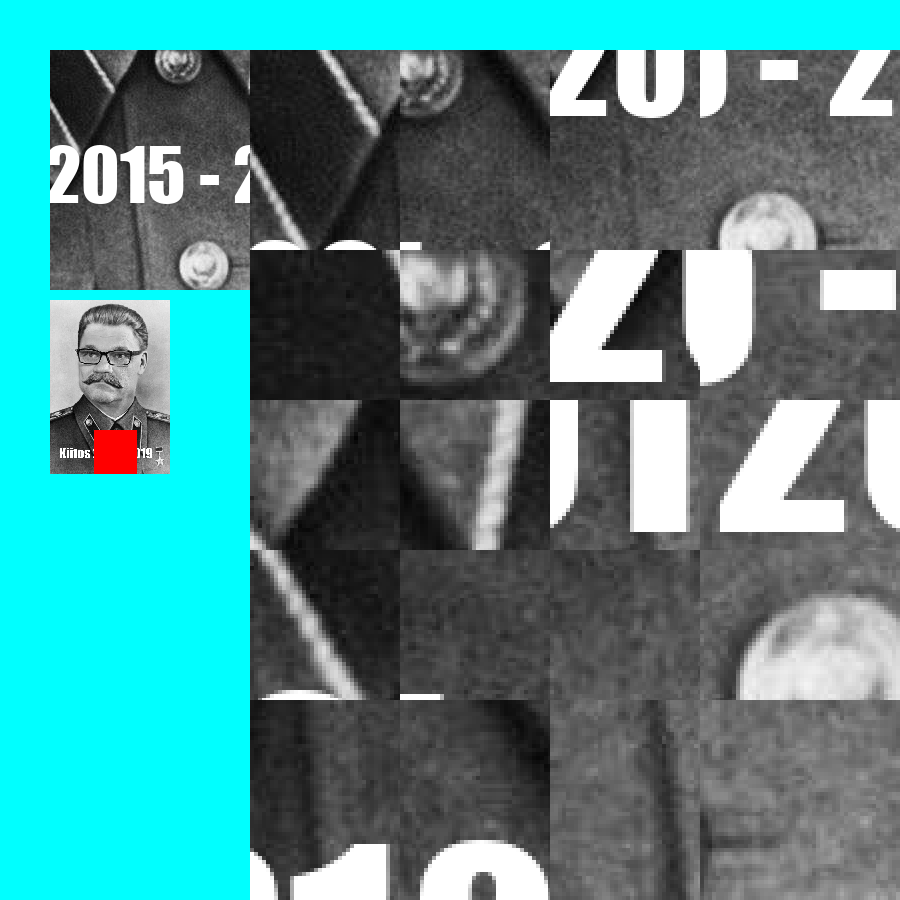

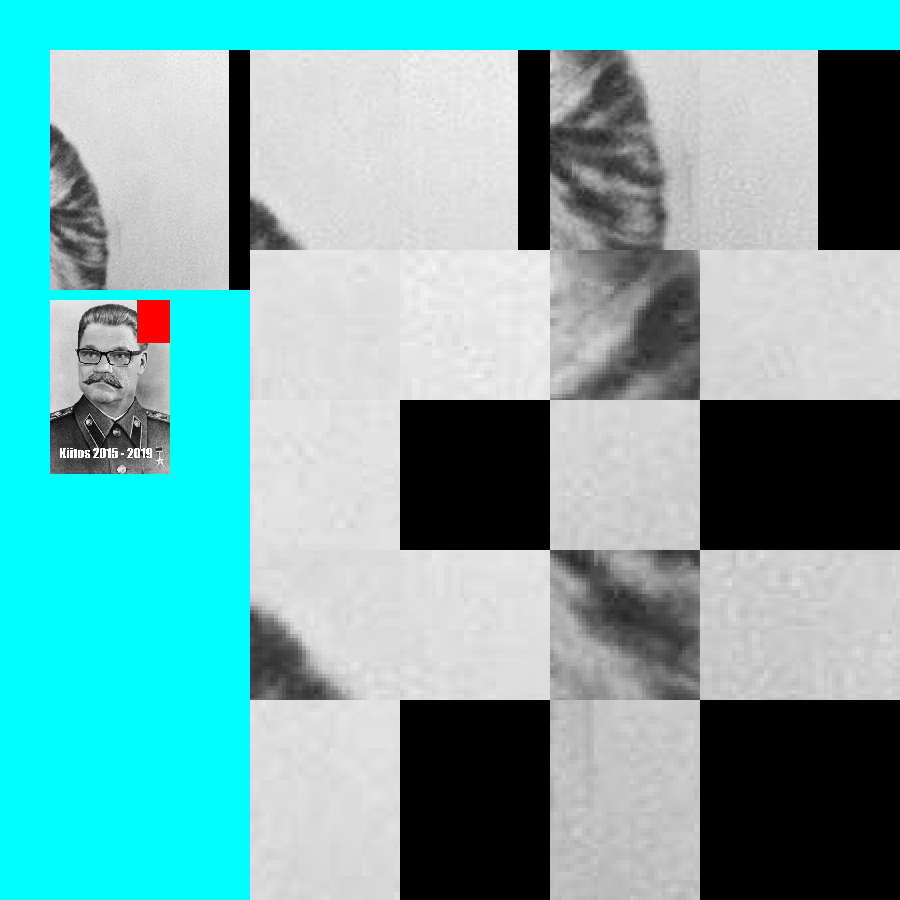

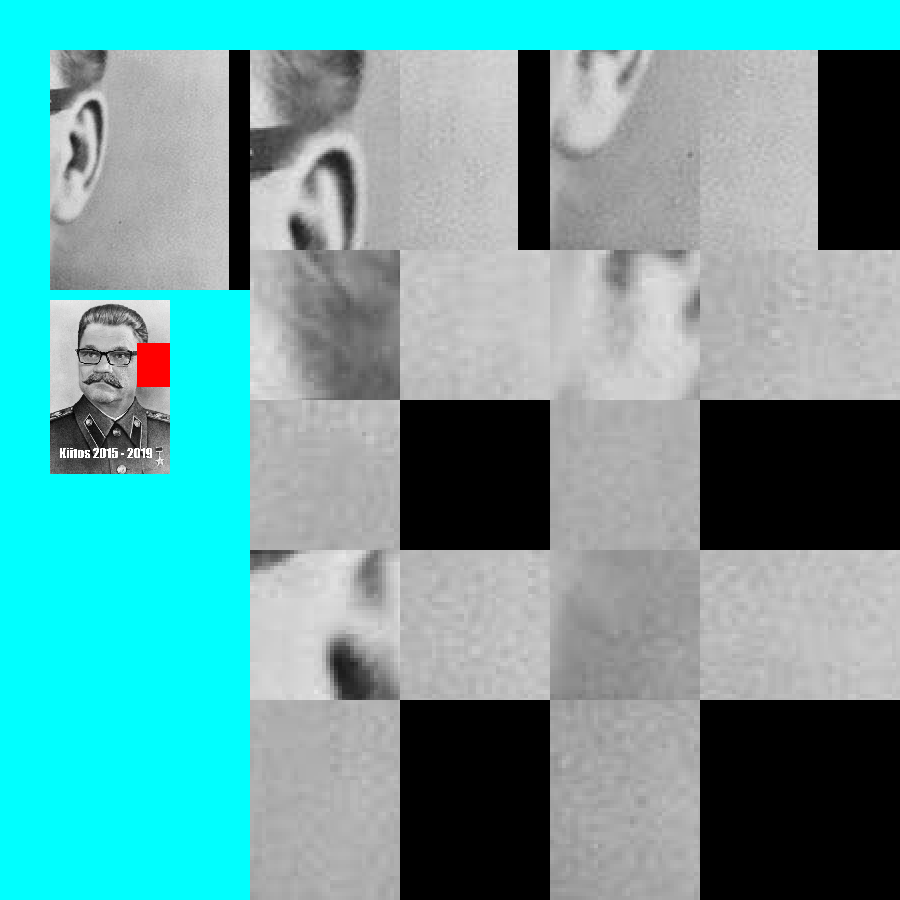

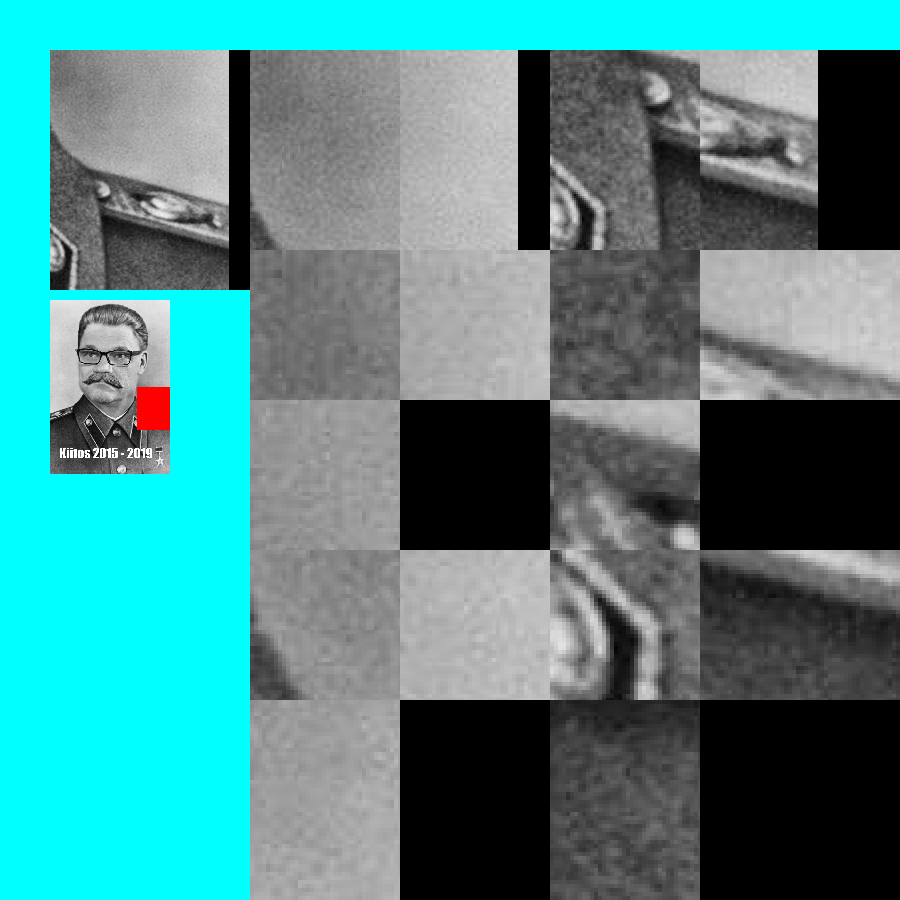

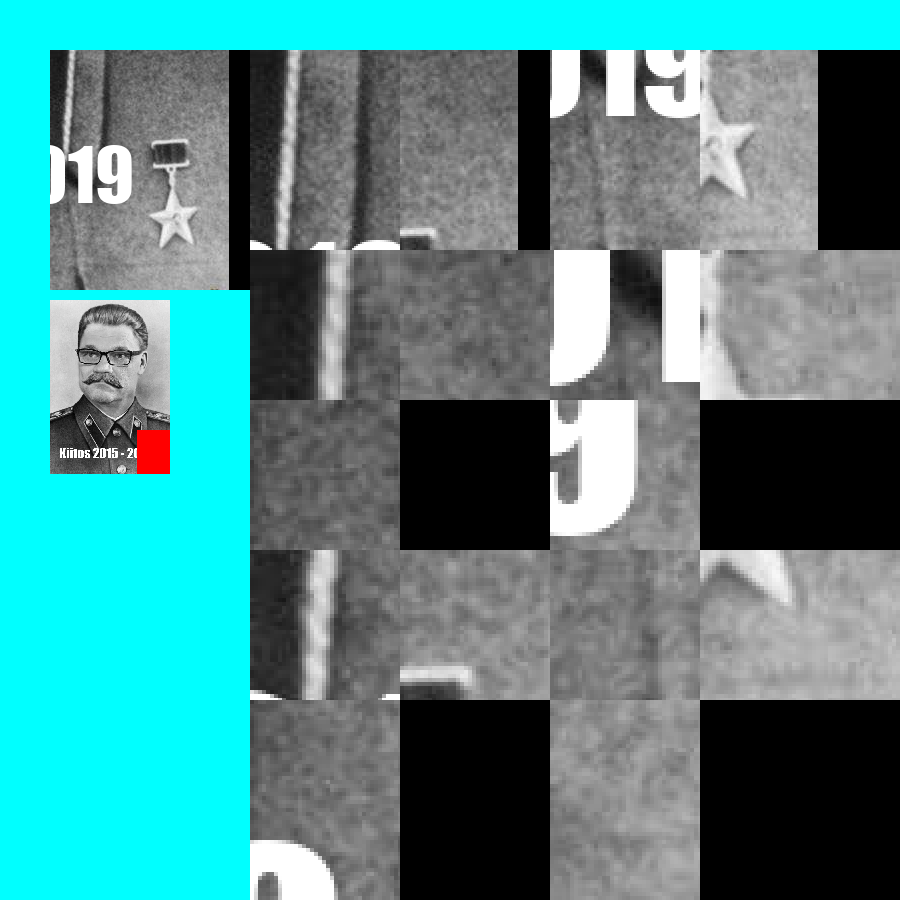

In [23]:
for i in range(nx):
    for j in range(ny):
        x = i * w
        y = j * w
        im = imIn.crop((x, y, x + w, y + w))
        display(subImg(i, j))
        

In [15]:
np.ceil(0.5)

1.0